# Usando K-means para detecção de valores anómalos

Usado para detectar valores atípicos num grupo de pontos. Uma solução para valores atípicos é remover estes, por outra parte valores atípicos podem ter gerado por erro em cálculos ou algum outro fator.

Para isso é bom encontrar os centroides e depois encontrar pontos que são potencialmente "valores atípicos"

## Como fazer

1. Criar um grupo de 100 pontos, e depois identificar os 5 pontos mais afastados do centroide , e estes são os pontenciais outliers (valores atípicos)

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, labels =  make_blobs(100, centers=1)
import numpy as np

2. É importante que o K-means tenha só um centro.

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmean = KMeans(n_clusters=1)
kmean.fit(X)

KMeans(n_clusters=1)

3. Visualizar, e tentar a achar os outliers (valores atípicos)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

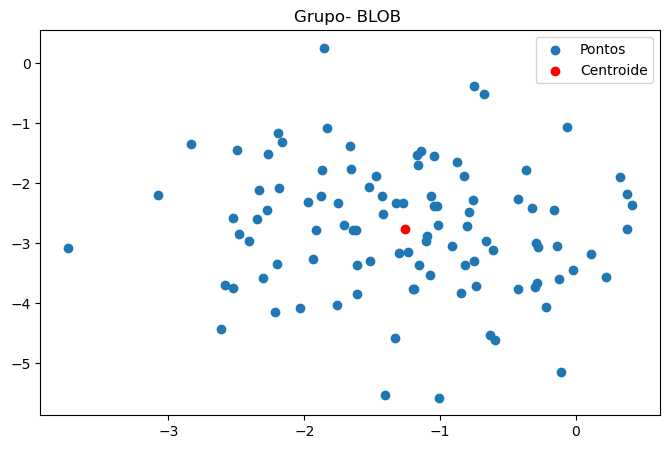

In [7]:
f, ax = plt.subplots(figsize=(8,5))
ax.set_title("Grupo- BLOB ")
ax.scatter(X[:,0], X[:,1], label="Pontos")
ax.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], label="Centroide", color="r")
ax.legend()
plt.show()

4. Identificar os valores atípicos

In [8]:
distancia = kmean.transform(X)

In [9]:
# argsort retorna um matriz com os pontos, todos indexados, e ordenado de forma ascendente
# se ordenamos em forma descendente , da para pegar os 5 primeiros.

In [10]:
sorted_idx = np.argsort(distancia.ravel())[::-1][:5]

5. Plotar os pontos mais afastados

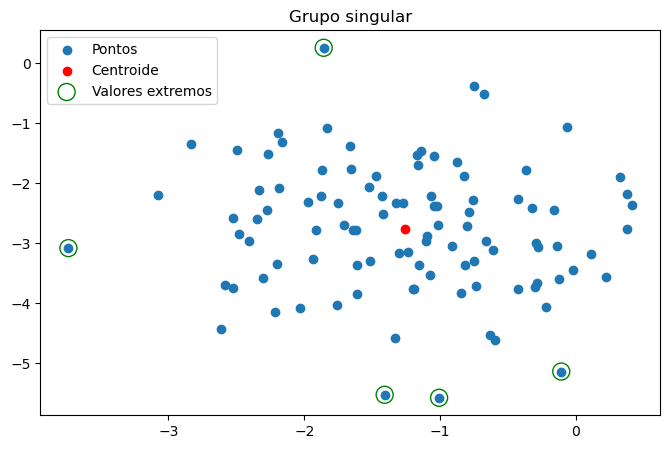

In [12]:
f, ax = plt.subplots(figsize=(8,5))
ax.set_title("Grupo singular")
ax.scatter(X[:,0], X[:,1], label="Pontos")
ax.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], label="Centroide", color="r")
ax.scatter(X[sorted_idx][:,0], X[sorted_idx][:,1], label="Valores extremos", edgecolors="g", facecolors="none", s=150)
ax.legend()
plt.show()

6. Remover os pontos

In [13]:
novo_X = np.delete(X, sorted_idx, axis=0)

Ao remover os pontos, logicamente o centroide vai mudar. Para isso tem que recalcular novamente

In [14]:
novo_kmean = KMeans(n_clusters=1)
novo_kmean.fit(novo_X)

KMeans(n_clusters=1)

7. visualizar a diferença entre o novo e o antigo centroide

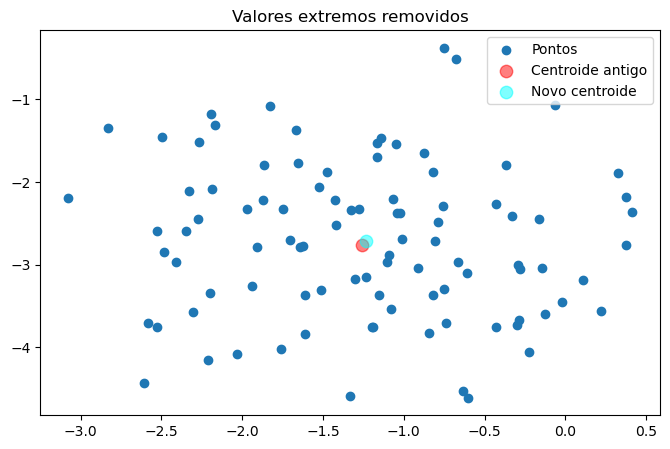

In [15]:
f,ax = plt.subplots(figsize=(8,5))
ax.set_title("Valores extremos removidos")
ax.scatter(novo_X[:,0], novo_X[:,1], label="Pontos")
ax.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], label="Centroide antigo", color="r", s=80, alpha=.5)
ax.scatter(novo_kmean.cluster_centers_[:,0], novo_kmean.cluster_centers_[:,1], label="Novo centroide", color="cyan",s=80, alpha=.5)
ax.legend(loc="best")
plt.show()

## Como funciona

Há uma conexão entre a distribuição Gaussiana e o agrupamento K-mean.
Teoricamente , os cinco pontos removidos, representa que foram removidos os valores com menor probabilidade, essa ideia entre distancias e probabilidades é muito importante. A modo de exemplo de um Gaussian empírico

In [16]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmean.cluster_centers_.ravel())

In [35]:
menor_prob = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[menor_prob])

True

# Usando a regressão KNN (K-nearest neighbor / k-vizinho mais proximo)

Esta regressão é claramente uma técnica supervisionada, para a regressão KNN, será calculada o K pontos mais proximos na variável do espaço para construir uma regressão ao invés de usar o espaço inteiro, como se faz em outras regressões.

Para isso, será usado o conjunto de dados `iris` um conjunto de dados sobre flores, para preever tamanho das petalas, agrupando por especies.

In [36]:
import numpy as np
from sklearn import datasets

In [37]:
iris = datasets.load_iris()

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

2. preveer comprimento das petala no "sepal", aplicar regressão linear, e regressão KNN para propósito de comparação

In [39]:
X = iris.data[:,:2]
y = iris.data[:,2]

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(X,y)

LinearRegression()

In [42]:
print(f"MSE é: {np.power(y-lr.predict(X),2).mean():.2}")

MSE é: 0.41


3. Regressão KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [45]:
print(f"MSE: {np.power(y-knnr.predict(X),2).mean():.2}")

MSE: 0.17


4. visualizar quando KNN tem 10 vizinhos

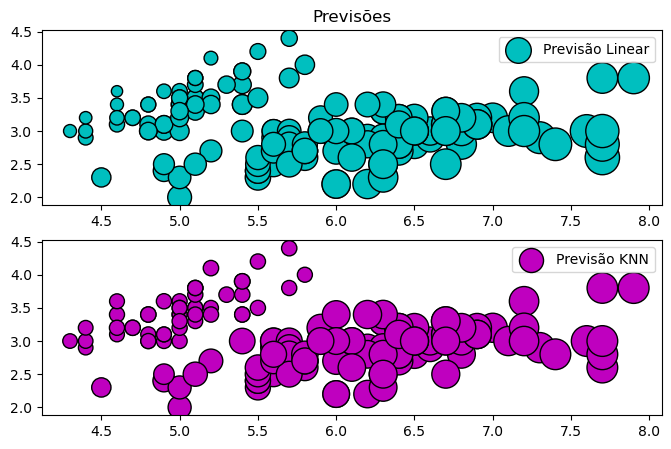

In [60]:
f,ax = plt.subplots(nrows=2, figsize=(8,5))
ax[0].set_title("Previsões")
ax[0].scatter(X[:,0], X[:,1], s=lr.predict(X)*80, label="Previsão Linear", color="c", edgecolors="black")
ax[1].scatter(X[:,0], X[:,1], s=knnr.predict(X)*80, label="Previsão KNN", color="m", edgecolors="black")
ax[0].legend()
ax[1].legend()
plt.show()

5. As previsões parecem estar bem parecidas, mas vamos olhar a previsão para a "Setosa" (espécie), comparada a atual.

In [49]:
setosa_idx = np.where(iris.target_names=="setosa")
setosa_masc = iris.target==setosa_idx[0]

In [53]:
# original
y[setosa_masc][:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [54]:
#regressão KNN
knnr.predict(X)[setosa_masc][:5]

array([1.46, 1.45, 1.51, 1.42, 1.47])

In [55]:
# regressão linear
lr.predict(X)[setosa_masc][:5]

array([1.84557896, 2.1597721 , 1.53692893, 1.49323201, 1.53415738])

Comparando as regressões com o "original", vemos que a regressão Linear sobreestimou os valores, e a regressão KNN é a mais próxima

## Como funciona

A regressão KNN é calculada pela média das distancias dos pontos mais proximos ao ponto que é testado. por exemplo

In [56]:
exemplo_ponto = X[0]
exemplo_ponto

array([5.1, 3.5])

Precisamos ter digamos que 10 pontos próximos ao `exemplo_ponto`

In [57]:
from sklearn.metrics import pairwise

In [58]:
distancias_ate_exemplo = pairwise.pairwise_distances(X)[0]

In [59]:
dez_pontos_proximos = X[np.argsort(distancias_ate_exemplo)][:10]
dez_pontos_y = y[np.argsort(distancias_ate_exemplo)][:10]
dez_pontos_y.mean()

1.46